In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

df = pd.read_csv("data_cleaned.csv")

display(df)

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_category
0,19,1,27.900,0,1,southwest,16884.92400,Surpoids,18-25
1,18,0,33.770,1,0,southeast,1725.55230,Obésité modérée,18-25
2,28,0,33.000,3,0,southeast,4449.46200,Obésité modérée,26-30
3,33,0,22.705,0,0,northwest,21984.47061,Poids normal,31-40
4,32,0,28.880,0,0,northwest,3866.85520,Surpoids,31-40
...,...,...,...,...,...,...,...,...,...
1332,50,0,30.970,3,0,northwest,10600.54830,Obésité modérée,41-50
1333,18,1,31.920,0,0,northeast,2205.98080,Obésité modérée,18-25
1334,18,1,36.850,0,0,southeast,1629.83350,Obésité sévère,18-25
1335,21,1,25.800,0,0,southwest,2007.94500,Surpoids,18-25


___
### Statistiques descriptives
___

### Analyse univariée

Dans cette partie, on étudie quelques variables intéressantes de notre dataframe pour en extraire les caractéristiques importantes. Cette étape permet d'avoir un premier aperçu de nos données avant de les croiser.

In [3]:
df.describe().round(2)

,age,sex,bmi,children,smoker,charges
count,1337.00,1337.0,1337.00,1337.00,1337.0,1337.00
mean,39.22,0.5,30.66,1.10,0.2,13279.12
std,14.04,0.5,6.10,1.21,0.4,12110.36
min,18.00,0.0,15.96,0.00,0.0,1121.87
25%,27.00,0.0,26.29,0.00,0.0,4746.34
50%,39.00,0.0,30.40,1.00,0.0,9386.16
75%,51.00,1.0,34.70,2.00,0.0,16657.72
max,64.00,1.0,53.13,5.00,1.0,63770.43


#### Pour les variables catégorielles, on calcule les effectifs et les pourcentages.

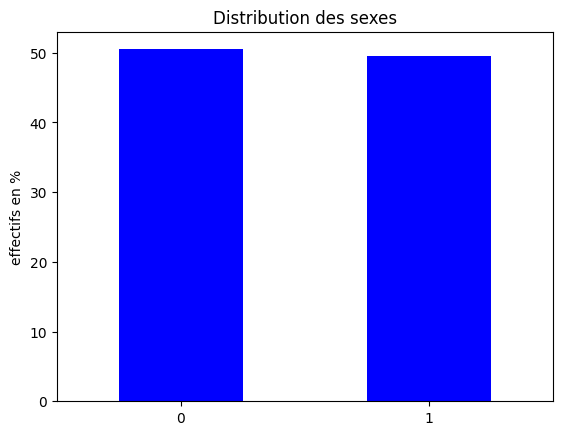

In [4]:
#calcule les effectifs et les %
df['sex'].value_counts() 
distri_sex = df['sex'].value_counts(normalize=True).round(4).mul(100)

distri_sex.plot(kind='bar', rot=0, color='blue')
plt.title("Distribution des sexes")
plt.ylabel('effectifs en %')
plt.xlabel('')
plt.show()


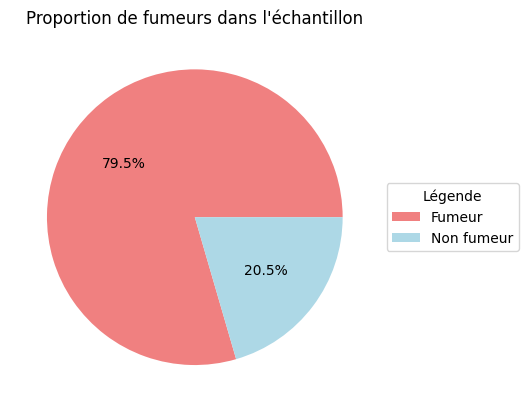

In [5]:
df['smoker'].value_counts()
distri_smoker = df['smoker'].value_counts(normalize=True).round(4).mul(100)

distri_smoker.plot(kind='pie', autopct='%1.1f%%', labels=None, colors=['lightcoral', 'lightblue'])

custom_legend = plt.legend(['Fumeur', 'Non fumeur'], title='Légende', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Proportion de fumeurs dans l'échantillon")
plt.ylabel('')
plt.xlabel('')
plt.legend
plt.show()

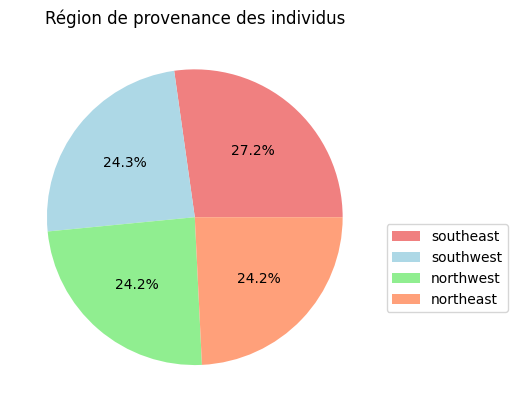

In [6]:
df['region'].value_counts()
distri_region = df['region'].value_counts(normalize=True).round(4).mul(100)

distri_region.plot(kind='pie', autopct='%1.1f%%', labels= None, colors=['lightcoral', 'lightblue', 'lightgreen', 'lightsalmon'])
plt.title('Région de provenance des individus')
plt.ylabel('')

plt.legend(labels=distri_region.index, loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

#### Pour les variables numériques, on peut analyser la distribution des données avec des outils comme l'histogramme ou la boîte à moustache.  Le boxplot est particulièrement utile car il aide à visualiser la symétrie des données.

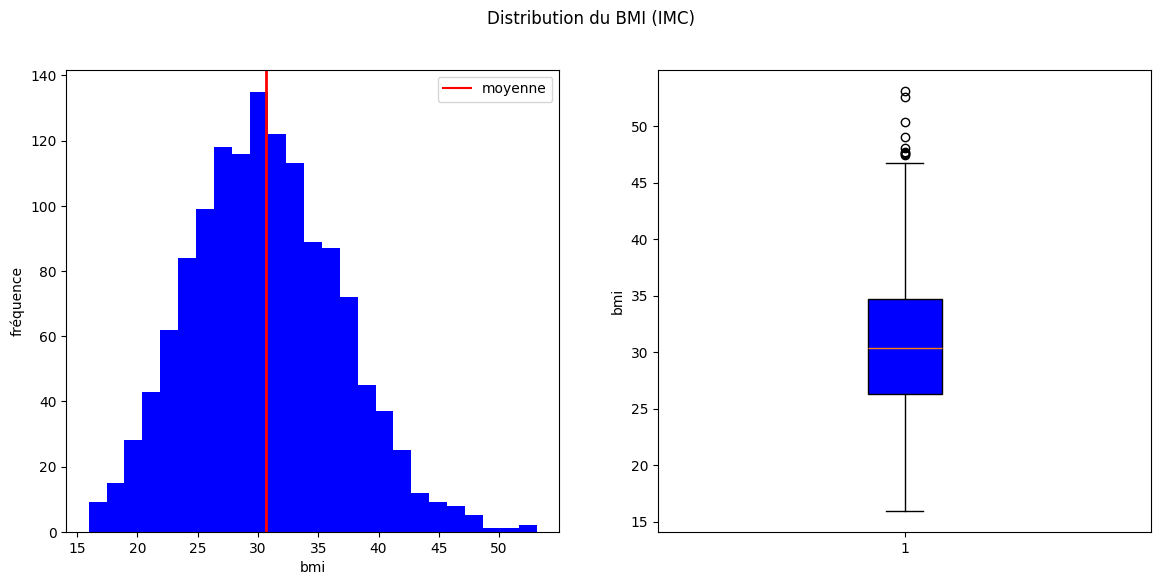

In [12]:
#Dispersion de la variable BMI
import matplotlib.lines as mlines

moy = df['bmi'].mean()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

fig.suptitle("Distribution du BMI (IMC)")

ax1.hist(df['bmi'], color = 'blue', bins=25)
ax1.axvline(moy, color ='r', linewidth = 2)
ax1.set_xlabel('bmi')
ax1.set_ylabel('fréquence')
ax1.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label='moyenne')])

ax2.boxplot(df['bmi'], patch_artist=True ,boxprops=dict(facecolor='blue'))
ax2.set_ylabel('bmi')

plt.show()

Les données sont bien dispersées autour de la moyenne.
La distribution est relativement bien symétrique, cela peut etre un signe de distribution normale

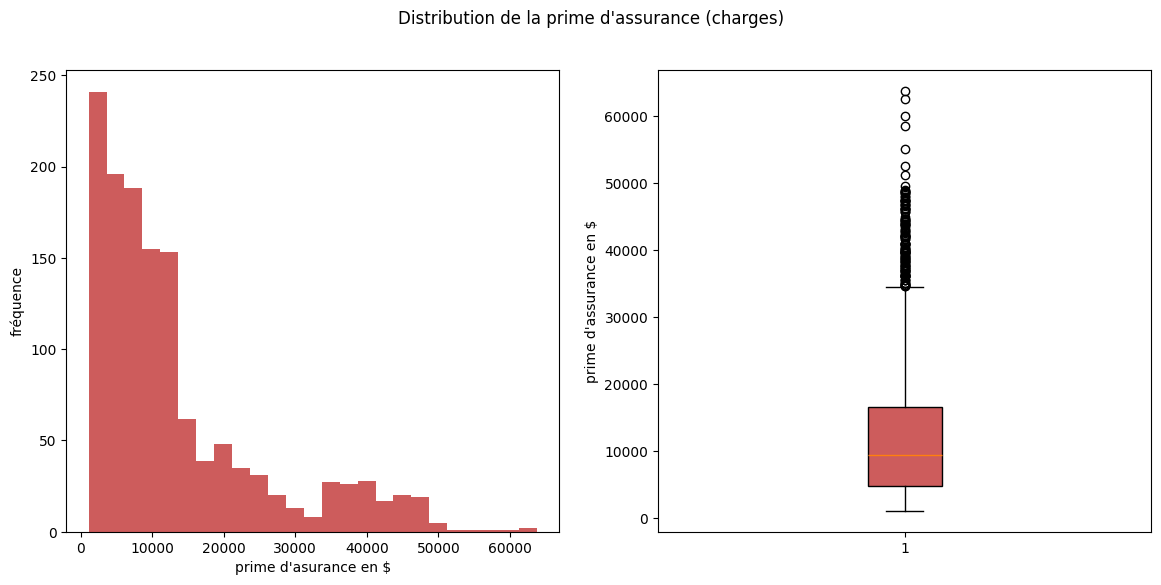

In [14]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

fig.suptitle("Distribution de la prime d'assurance (charges)")

ax1.hist(df['charges'], color = 'indianred', bins=25)
ax1.set_xlabel("prime d'asurance en $")
ax1.set_ylabel('fréquence')

ax2.boxplot(df['charges'], patch_artist=True ,boxprops=dict(facecolor='indianred'))
ax2.set_ylabel("prime d'assurance en $")

plt.show()

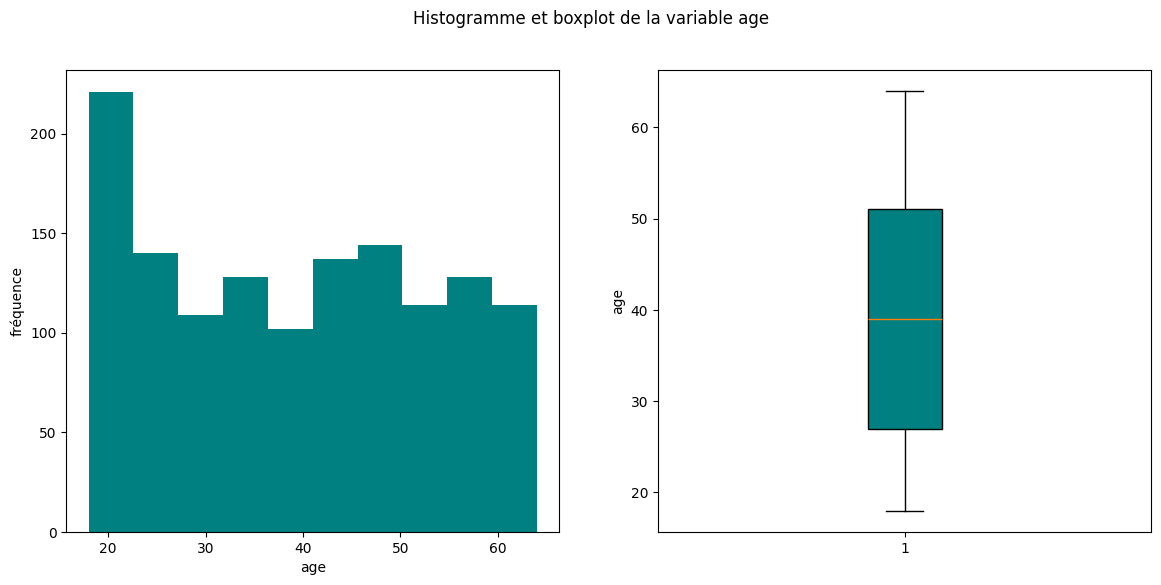

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

fig.suptitle("Histogramme et boxplot de la variable age")

ax1.hist(df['age'], color = 'teal', bins=10)
ax1.set_xlabel("age")
ax1.set_ylabel('fréquence')

ax2.boxplot(df['age'], patch_artist=True ,boxprops=dict(facecolor='teal'))
ax2.set_ylabel("age")

plt.show()

### Analyse bivariée

La premiere étape de l'analyse bivariée c'est à dire, l'analyse entre 2 variables, c'est de calculer la matrice de corrélation et de la visualiser à l'aide de la heatmap proposée dans la librairie seaborn. 

Pour ce faire, nous mettons de côté les variables catégorielles pour le moment car la matrice de correlation évalue uniquement le lien linéaire entre deux variables quantitatives.

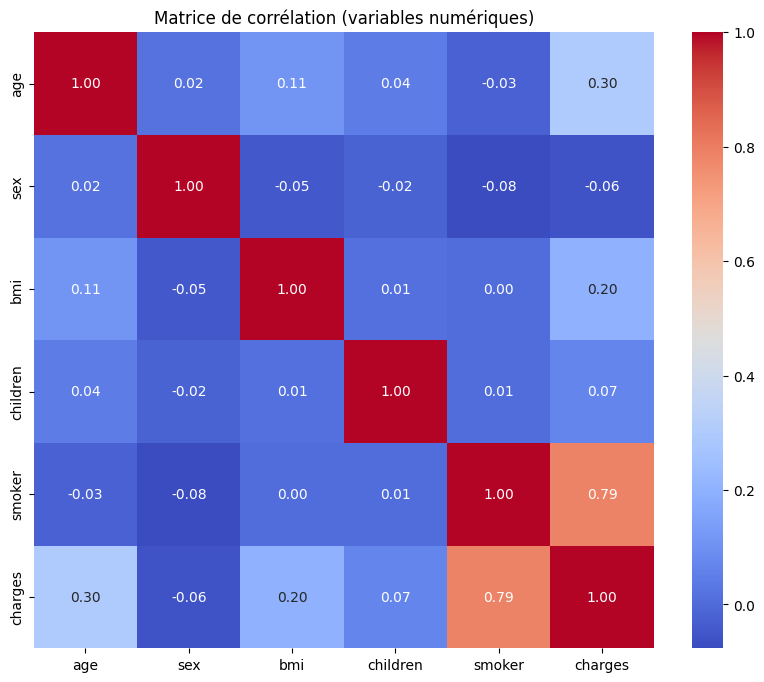

In [20]:

df_numerique = df.select_dtypes(include=['float64', 'int64'])

corr= df_numerique.corr() #creer la matrice de corrélation

plt.figure(figsize=(10, 8)) #creer la heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f') #fmt indique le presenter les correlations à 2 chiffres aprés la virgule
plt.title('Matrice de corrélation (variables numériques)')
plt.show()

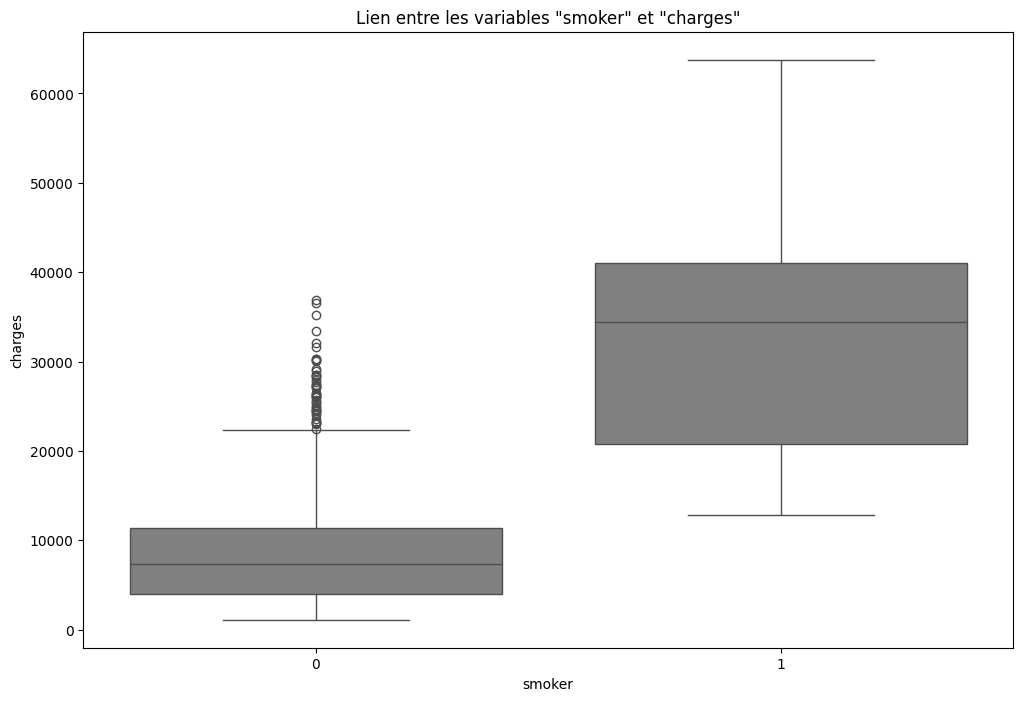

In [21]:
#la matrice montre un lien fort entre le fait de fumer et payer une prime lourde. Visualisons la relation avec des boxplots pour chaque catégoriue de la variable 'smoker'.

plt.figure(figsize=(12,8))
sns.boxplot(x='smoker', y='charges', data = df, color='grey')
plt.title('Lien entre les variables "smoker" et "charges"')

plt.show()


On peut déjà émettre des constats, pour les non-fumeurs:
    - la médiane est centrée à environ 8 000 $: la majorité des non fumeurs sont regroupés autour de cette valeur.
    - la boite compacte signifie une dispersion faible des charges dans cette population;
    - la moustache supérieure signale la présence de quelques outliers.

Pour les fumeurs:
    - la médiane est plus élevée (35 000$),
    - la boite est plus etiree, les valeurs des charges sont plus dispersees que chez les non-fumeurs

Pour approfondir l'analyse, on fait un test statistique pour évaluer la significativité des charges pour les fumeurs et non-fumeurs.

In [22]:
from scipy.stats import ttest_ind
#le but est d'étudier les moyennes des charges chez les groupes fumeur et non fumeur
group1 = df[df['smoker']==0]
group2 = df[df['smoker']==1]

ttest_ind(group1['charges'], group2['charges'])

TtestResult(statistic=-46.64479459840305, pvalue=1.4067220949376498e-282, df=1335.0)

On observe que t test statistique = -46,65 et p-value=1.41*10^-282
p-value < 0,05 donc on peut conclure que les differences entre les moyennes de charges entre les 2 groupes sont significatives

Etudions maintenant le lien entre lers variables age et charges. 

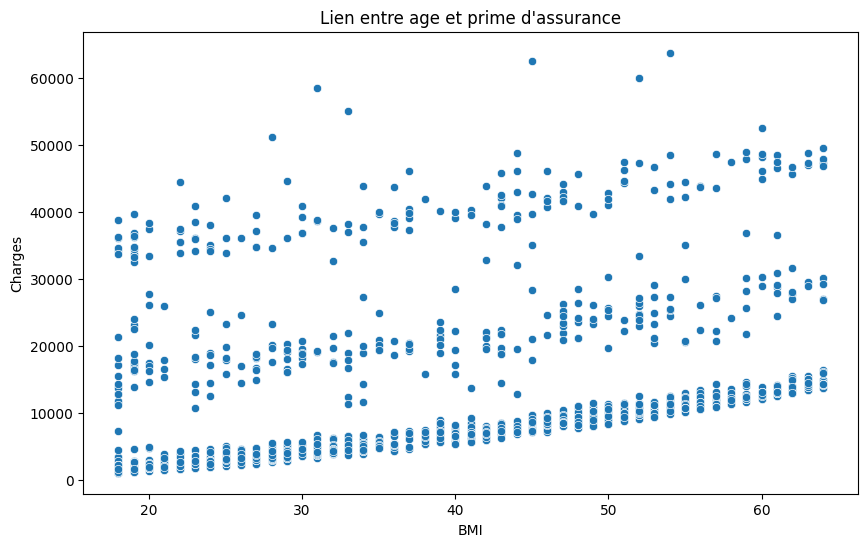

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df)
plt.title("Lien entre age et prime d'assurance")
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

On obtient 3 nuages de points distinctifs qui representeraient chacun 3 courbes évoluant en parallèle. Il s'agirait des 3 groupes distincts et donc une autre variable catégorielle serait le facteur d'influence.

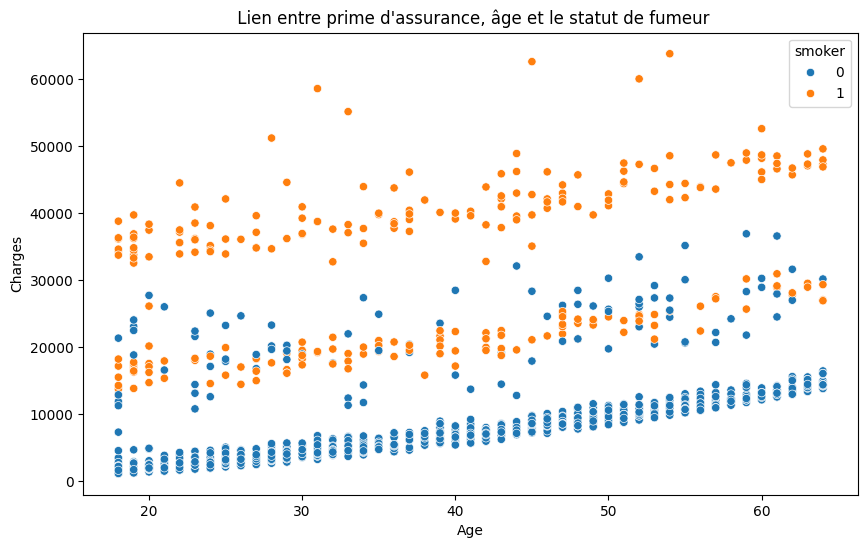

In [19]:
#on trace le nuage de points et on intégre une variable catégorielle dans le parametre hue
plt.figure(figsize=(10, 6))

sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title(" Lien entre prime d'assurance, âge et le statut de fumeur")
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

<Figure size 1000x600 with 0 Axes>

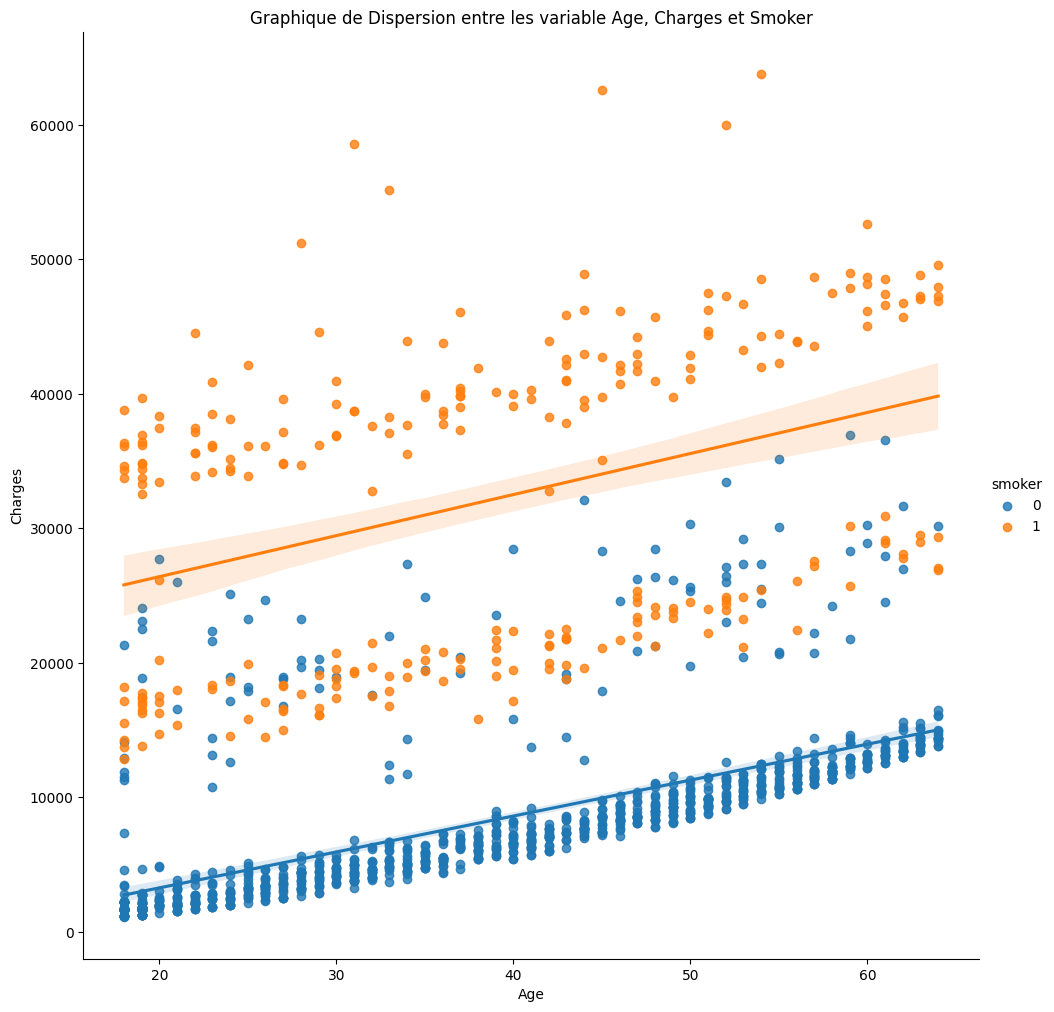

In [25]:
#ajouter droite de regression par groupe
plt.figure(figsize=(10, 6))

sns.lmplot(x='age', y='charges', hue='smoker', data=df, height=10)
plt.title('Graphique de Dispersion entre les variable Age, Charges et Smoker')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

La séparation des nuages de points suggère que la relation entre age et charges peut être différente selon que la personne est fumeuse ou non.

Pour la suite, il faut tenir compte de ces points.


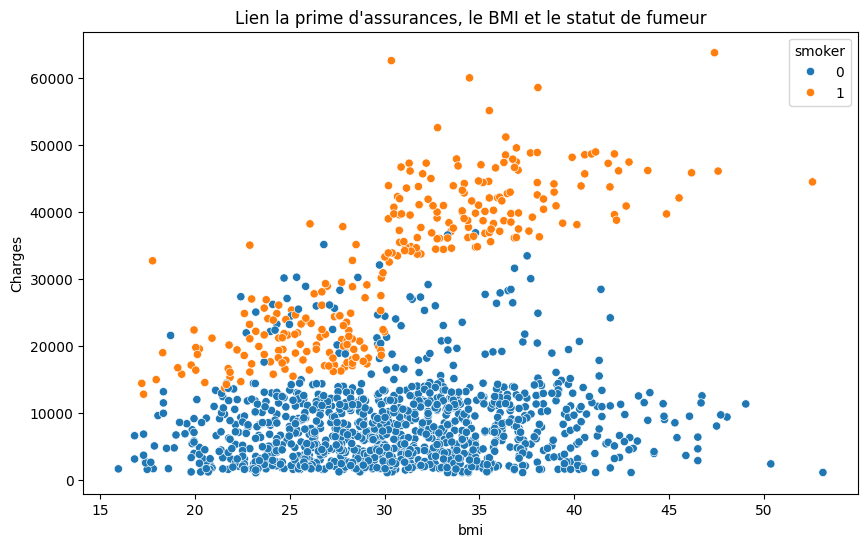

In [21]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("Lien la prime d'assurances, le BMI et le statut de fumeur")
plt.xlabel('bmi')
plt.ylabel('Charges')
plt.show()

In [27]:
a, b, r,p,_ = stats.linregress(df.bmi, df.charges) #(axes x,y)
a,b,r,p

(393.8558912099734,
 1202.1403670662148,
 0.1984008312262494,
 2.4680404264512973e-13)

Analyse de la variance

Il s'agit ici d'étudier l'impact d'une variable qualitative sur une variable quantitative.
Nos variables qualitatives: le sexe du client et la région de provenance.

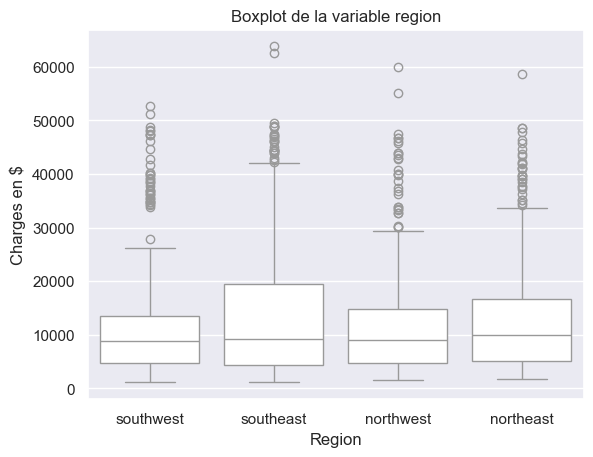

In [28]:
sns.set()

ax = sns.boxplot(x="region", y="charges", data=df, color='white')
plt.xlabel('Region')
plt.ylabel('Charges en $')
plt.title('Boxplot de la variable region')
plt.show()

La médiane est la même sur toutes les régions, quelques variations sont à noter pour la variation interquartile due aux quartiles supérieurs qui change légèrement pour l'ensemble des régions exceptées 'Southeast' où il est plus élevé. 
Dans toutes les régions, on remarque la présence d'outliers dans la partie supérieure.


In [29]:
plt.barplot(df['region'], df['bmi'])

AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'

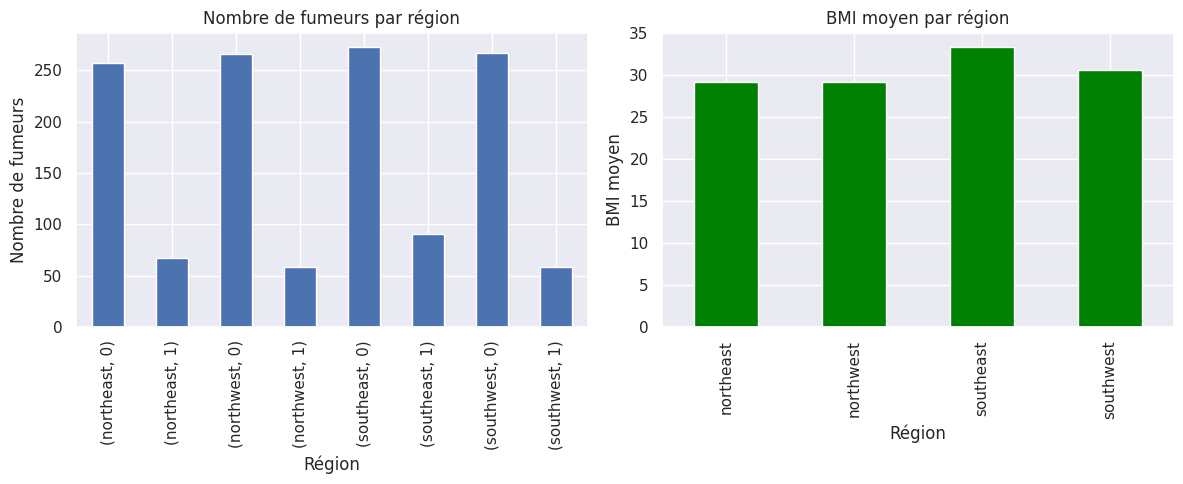

In [ ]:
smoker_nb = df.groupby('region')['smoker'].value_counts()

bmi_moy = df.groupby('region')['bmi'].mean()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

smoker_nb.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Nombre de fumeurs par région')
axes[0].set_xlabel('Région')
axes[0].set_ylabel('Nombre de fumeurs')

# ax.set_xticks(range(len(smoker_counts.index)))
# ax.set_xticklabels(smoker_counts.index, rotation=0)

# Légende pour indiquer les couleurs (fumeurs et non-fumeurs)
ax.legend(['Non-fumeurs', 'Fumeurs'], loc='upper right')

# Tracer le BMI moyen par région
bmi_moy.plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('BMI moyen par région')
axes[1].set_xlabel('Région')
axes[1].set_ylabel('BMI moyen')

plt.tight_layout()
plt.show()


In [ ]:
anova_region = smf.ols('charges~region', data=df).fit()
print(anova_region.summary())
#test de fisher
sm.stats.anova_lm(anova_region, typ=2)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     2.926
Date:                Tue, 09 Jan 2024   Prob (F-statistic):             0.0328
Time:                        14:58:13   Log-Likelihood:                -14462.
No. Observations:                1337   AIC:                         2.893e+04
Df Residuals:                    1333   BIC:                         2.895e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.341e+04    

,sum_sq,df,F,PR(>F)
region,1.281906e+09,3.0,2.92614,0.032763
Residual,1.946569e+11,1333.0,NaN,NaN


la p-value est inférieure au seuil de 0,05% ce qui permet de rejeter l'hypothése nulle. Les moyennes des charges varient de façon significative entre au moins 2 groupes de 'region'. Cela suggére que les régions ont un effet significatif sur les charges payées par les clients. 
Cette conclusion justifie davantage d'explorer les différences spécifiques entre les régions pour mieux comprendre comment et pourquoi ces variations se produisent.

Anova pour la variable 'sexe'

In [48]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error


train, test = train_test_split(df, test_size=0.2)

X_train=train[['age', 'smoker']] #on prend uniquement les données d'interet
y_train = train['charges']

model = LinearRegression()
model.fit(X_train, y_train)
#model.score(X_train, y_train)

predictions = model.predict(X_train)

#plt.scatter(X,y, color = 'blue')
#plt.plot(X, predictions, color = 'pink')

# Faites des prédictions sur les données de test
X_test = test[['age', 'smoker']]
y_test = test['charges']
predictions_test = model.predict(X_test)

r2_test = r2_score(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = np.sqrt(mse_test)

r2 = r2_score(y_train, predictions)
mse_train = mean_squared_error(y_train, predictions)
rmse_train = np.sqrt(mse_train)

print(f"R^2 Score (Train): {r2_train}")
print(f"MSE (Train): {mse_train}")
print(f"RMSE (Train): {rmse_train}")



NameError: name 'r2_train' is not defined

In [ ]:

train, test = train_test_split(df, test_size=0.2) #divise données en 80/20

X_train = train[['age', 'smoker', 'bmi']] #X_train est une matrice avec les données explicatives numériques
y_train = train['charges']

# Créez le modèle de régression linéaire
model = LinearRegression()

# Entraînez le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faites des prédictions sur les données d'entraînement
predictions_train = model.predict(X_train)

# Calculez le R^2 et l'erreur quadratique moyenne (MSE) sur les données d'entraînement
r2_train = r2_score(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = np.sqrt(mse_train)

print(f"R^2 Score (Train): {r2_train}")
print(f"MSE (Train): {mse_train}")
print(f"RMSE (Train): {rmse_train}")

# Faites des prédictions sur les données de test
X_test = test[['age', 'smoker']]
y_test = test['charges']
predictions_test = model.predict(X_test)

# Calculez le R^2 et l'erreur quadratique moyenne (MSE) sur les données de test
r2_test = r2_score(y_test, predictions_test)
mse_test = mean_squared_error(y_test, predictions_test)
rmse_test = np.sqrt(mse_test)

print(f"R^2 Score (Test): {r2_test}")
print(f"MSE (Test): {mse_test}")
print(f"RMSE (Test): {rmse_test}")

plt.scatter(X_test['age'], y_test, label='charges observées')
plt.scatter(X_test['age'], predictions_test, c='r', label='charges prédites')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()


NameError: name 'train_test_split' is not defined

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_category
0,19,1,27.900,0,1,southwest,16884.92400,Surpoids,18-25
1,18,0,33.770,1,0,southeast,1725.55230,Obésité modérée,18-25
2,28,0,33.000,3,0,southeast,4449.46200,Obésité modérée,26-30
3,33,0,22.705,0,0,northwest,21984.47061,Poids normal,31-40
4,32,0,28.880,0,0,northwest,3866.85520,Surpoids,31-40
...,...,...,...,...,...,...,...,...,...
1332,50,0,30.970,3,0,northwest,10600.54830,Obésité modérée,41-50
1333,18,1,31.920,0,0,northeast,2205.98080,Obésité modérée,18-25
1334,18,1,36.850,0,0,southeast,1629.83350,Obésité sévère,18-25
1335,21,1,25.800,0,0,southwest,2007.94500,Surpoids,18-25


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

#train, test = train_test_split(df, test_size=0.2)

#X_train = train[['age', 'smoker']]
y_train = train['charges']  #vecteur target

#X_train = pd.get_dummies(train[['age', 'smoker', 'bmi']], columns=['bmi'], drop_first=True) #encode bmi
X_train = RobustScaler().fit_transform(X_train)


X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, shuffle=True, train_size=0.85, random_state=42, stratify=X_train['smoker'])

model = LinearRegression()

model.fit(X_train, y_train) #entraine le modele

predictions_train = model.predict(X_train) 


r2_train = r2_score(y_train, predictions_train) #calcul r2 et mse sur train
mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = np.sqrt(mse_train)

print(f"R^2 Score (Train): {r2_train}")
print(f"MSE (Train): {mse_train}")
print(f"RMSE (Train): {rmse_train}")

df


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

model = ElasticNet (l1_ratio = 1)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(model, X, y, scoring = 'neg_mean_absolute_error', cv = cv, n_jobs=-1)

scores = abs(scores)

print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

NameError: name 'X' is not defined

___
### Construction de modèles
___

Pour le traitement de nos données par les modéles de machine learning, on doit encoder les variables catégorielles. La variable 'region' n'est pas encodée, on utilisera l'encodage one hot.

L'encodage one-hot est une technique qui convertit chaque catégorie d'une variable catégorielle en une nouvelle colonne binaire et attribue une valeur de 1 à la colonne correspondante pour chaque échantillon. Chaque échantillon aura une seule colonne activée (1) et toutes les autres seront désactivées (0).

Elastic Net est un algorithme de machine learning puissant qui combine les regressions Lasso et Ridge.

In [ ]:
df_encoded = pd.get_dummies(df, columns=['region'])

df_encoded




,age,sex,bmi,children,smoker,charges,bmi_category,age_category,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,Surpoids,18-25,False,False,False,True
1,18,0,33.770,1,0,1725.55230,Obésité modérée,18-25,False,False,True,False
2,28,0,33.000,3,0,4449.46200,Obésité modérée,26-30,False,False,True,False
3,33,0,22.705,0,0,21984.47061,Poids normal,31-40,False,True,False,False
4,32,0,28.880,0,0,3866.85520,Surpoids,31-40,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,50,0,30.970,3,0,10600.54830,Obésité modérée,41-50,False,True,False,False
1333,18,1,31.920,0,0,2205.98080,Obésité modérée,18-25,True,False,False,False
1334,18,1,36.850,0,0,1629.83350,Obésité sévère,18-25,False,False,True,False
1335,21,1,25.800,0,0,2007.94500,Surpoids,18-25,False,False,False,True


La normalisation permet de réduire l'étendue des données en les centrant. On normalise nos données en créant un nouveau dataframe.

In [ ]:
df
    

,age,sex,bmi,children,smoker,region,charges,bmi_category,age_category
0,19,1,27.900,0,1,southwest,16884.92400,Surpoids,18-25
1,18,0,33.770,1,0,southeast,1725.55230,Obésité modérée,18-25
2,28,0,33.000,3,0,southeast,4449.46200,Obésité modérée,26-30
3,33,0,22.705,0,0,northwest,21984.47061,Poids normal,31-40
4,32,0,28.880,0,0,northwest,3866.85520,Surpoids,31-40
...,...,...,...,...,...,...,...,...,...
1332,50,0,30.970,3,0,northwest,10600.54830,Obésité modérée,41-50
1333,18,1,31.920,0,0,northeast,2205.98080,Obésité modérée,18-25
1334,18,1,36.850,0,0,southeast,1629.83350,Obésité sévère,18-25
1335,21,1,25.800,0,0,southwest,2007.94500,Surpoids,18-25


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
#modelisation

df_encoded = pd.get_dummies(df, columns=['region'])



train, test = train_test_split(df, test_size=0.2) #divise données en 80/20

X_train = train[['age', 'smoker', 'bmi', 'children']] #[[liste de noms de colonnes]]
                
#X_train_encoded = pd.get_dummies(X_train, columns=['region'], prefix='region')]] #X_train est une matrice avec les données explicatives numériques
y_train = train['charges']


X_train_robust = RobustScaler().fit_transform(X_train)

train['charges_log'] = np.log1p(train['charges'])

#creer variables polynomiales a partir de nos variables
X_poly = PolynomialFeatures(2).fit_transform(X_train_robust)
X_poly_robust = RobustScaler().fit_transform(X_poly)

# Crée le modèle de régression linéaire
model = LinearRegression()

# Entraîne le modèle sur les données d'entraînement
model.fit(X_poly, y_train)

# Faire des prédictions sur les données d'entraînement
predictions_train = model.predict(X_poly_robust)

# Calcule le R^2 et l'erreur quadratique moyenne (MSE) sur les données d'entraînement
r2_train = r2_score(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
rmse_train = np.sqrt(mse_train)

print(f"R^2 Score (Train): {r2_train}")
print(f"MSE (Train): {mse_train}")
print(f"RMSE (Train): {rmse_train}")

# # predictions sur le test
# X_test = test[['age', 'smoker', 'bmi']]
# y_test = test['charges']
# predictions_test = model.predict(X_test)

# # Calcul de l'erreur sur le test
# r2_test = r2_score(y_test, predictions_test)
# mse_test = mean_squared_error(y_test, predictions_test)
# rmse_test = np.sqrt(mse_test)

# print(f"R^2 Score (Test): {r2_test}")
# print(f"MSE (Test): {mse_test}")
# print(f"RMSE (Test): {rmse_test}")

# plt.scatter(X_test['age'], y_test, label='charges observées')
# plt.scatter(X_test['age'], predictions_test, c='r', label='charges prédites')
# plt.xlabel('Age')
# plt.ylabel('Charges')
# plt.legend()
# plt.show()


NameError: name 'train_test_split' is not defined

In [12]:
#Pipelines pour machine learning sur dataframe df
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, RobustScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

train, test = train_test_split(df, test_size=0.2, random_state=42) #divise données en 80/20
X_train = train[['age', 'smoker', 'bmi', 'children']] #[[liste de noms de colonnes]]
                
#X_train_encoded = pd.get_dummies(X_train, columns=['region'], prefix='region')]] #X_train est une matrice avec les données explicatives numériques

X_train = train[['age', 'smoker', 'bmi', 'children']] #[[liste de noms de colonnes]]
y_train = train['charges']

X_test = test[['age', 'smoker', 'bmi', 'children']]
y_test = test['charges']

model = make_pipeline (PolynomialFeatures(), RobustScaler(), Lasso())

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

params = {'polynomialfeatures__degree': [1,2,3]}

grid = GridSearchCV(model, param_grid=params, cv =4)

grid.fit(X_train, y_train)

r2_test = r2_score(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
rmse_test = mean_squared_error(y_test, y_pred, squared=False)
print(f"R^2 Score (Test): {r2_test}")
print(f"MSE (Test): {mse_test}")
print(f"RMSE (Test): {rmse_test}")

/home/utilisateur/Documents/Projets/insurance_prediction/insurance_premium_SC/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.456e+09, tolerance: 1.074e+07
  model = cd_fast.enet_coordinate_descent(
/home/utilisateur/Documents/Projets/insurance_prediction/insurance_premium_SC/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.151e+09, tolerance: 1.086e+07
  model = cd_fast.enet_coordinate_descent(
/home/utilisateur/Documents/Projets/insurance_prediction/insurance_premium_SC/venv/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:628: 

R^2 Score (Test): 0.8828935171411958
MSE (Test): 21519026.36383034
RMSE (Test): 4638.8604596204805


In [16]:
import joblib

modele_file = 'modele_insur.sav'
joblib.dump(model, modele_file)

['modele_insur.sav']

In [19]:

#sauvegarder modèle avec joblib
modele = 'joblib_model.sav'
joblib.dump(model, modele)

['joblib_model.sav']

In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

n = X_train.shape[0]
p = X_train.shape[1]

X_transformed = preprocessing_poly_std.fit_transform(X_train)
col_name = preprocessing_poly_std.get_feature_names_out()

X_transformed = pd.DataFrame(data=X_transformed, columns=col_name, index=y_train.index)

X_s = sm.add_constant(X_transformed)
model = sm.OLS(y_train, X_s)
results = model.fit()
results.summary()

un exemple dde regression lineaire pour le canva

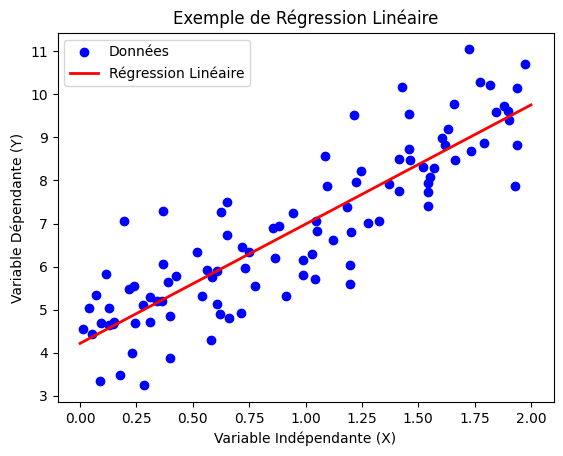

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Générer des données aléatoires pour l'exemple
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

# Nuage de points
plt.scatter(X, Y, color='blue', label='Données')

# Ajustement de la régression linéaire
model = LinearRegression()
model.fit(X, Y)
X_new = np.linspace(0, 2, 100).reshape(-1, 1)
Y_pred = model.predict(X_new)

# Tracer la régression linéaire
plt.plot(X_new, Y_pred, color='red', linewidth=2, label='Régression Linéaire')

# Configurations du graphique
plt.xlabel('Variable Indépendante (X)')
plt.ylabel('Variable Dépendante (Y)')
plt.title('Exemple de Régression Linéaire')
plt.legend()
plt.show()
